In [2]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
MLP={'Model': ['MLP']*24,
     'DL Model':['Plain MLP']*6 + ['Multi-Headed MLP']*6 + ['Multi-output MLP']*6 + ['Multi-headed Multi-output MLP']*6,
     'Transformation': ['W/O','W/O','Square-Root','Square-Root','Log','Log']*4,
     'Forecast Interval':['1 Week', '1 Day']*12,
     'Run-Time': [346.07,346.00,321.46,339.00,331.15,341.68,162.95,207.41,174.92,197.09,168.43,199.72,
                   379.95,340.96,364.20,344.35,373.31,348.36,233.91,205.02,224.07,196.98,231.89,196.90],
     'MAPE': [46.40,36.51,47.18,35.72,46.58,16.04,17.36,10.29,22.88,23.63,23.17,8.83,46.87,33.34,46.45,
               34.45,31.73,23.69,19.66,14.81,23.22,20.58,17.89,10.32],
     'RMSE': [1195.08, 910.86, 1177.53, 881.52, 1095.54, 368.68, 544.89, 324.89, 687.68, 670.12,734.62,267.52, 
              1205.37, 875.71, 1191.60, 864.07, 718.74, 521.81, 624.35, 427.22,685.72, 606.43, 506.01, 307.95]}

CNN={'Model': ['CNN']*24,
     'DL Model':['Plain CNN']*6 + ['Multi-Headed CNN']*6 + ['Multi-output CNN']*6 + ['Multi-headed Multi-output CNN']*6,
     'Transformation': ['W/O','W/O','Square-Root','Square-Root','Log','Log']*4,
     'Forecast Interval':['1 Week', '1 Day']*12,
     'Run-Time': [78.66,73.70,69.69,74.85,71.03,89.42,3067.70,3639.75,3209.67,3089.74,3119.80,3247.85,224.31,
                  181.84,228.06,210.16,223.36,182.95,3105.54,3211.35,3250.60,3105.99,3103.32,3095.42],
     'MAPE': [55.21,53.66,53.39,42.48,24.32,22.15,24.42,20.61,25.32,26.23,27.78,29.35,55.35,64.33,34.20,26.66,
              31.93,31.23,27.35,18.82,27.26,35.42,30.38,24.22],
     'RMSE': [1366.81,1338.43,1319.47,1096.23,631.50,601.92,749.55,611.21,717.90,650.37,760.05,724.64,1370.22,
              1561.12,870.99,770.36,821.15,792.48,752.73,551.84,759.21,879.67,813.50,575.96]}

LSTM={'Model': ['LSTM']*36,
    'DL Model':['Vanilla LSTM']*6 + ['Stacked LSTM']*6 + ['Bidirectional LSTM']*6 + ['CNN-LSTM']*6 +
      ['ConvLSTM']*6 + ['Encoder-Decoder LSTM']*6,
     'Transformation': ['W/O','W/O','Square-Root','Square-Root','Log','Log']*6,
     'Forecast Interval':['1 Week', '1 Day']*18,
     'Run-Time': [33.56,32.30,31.14,37.91,29.48,34.97,54.98,59.43,54.74,60.21,57.43,60.15,35.81,40.79,35.90,40.00,
                  35.11,40.52,23.28,29.31,24.03,28.77,25.37,28.01,39.26,41.77,40.62,41.37,37.65,44.88,65.28,51.06,
                  62.06,49.13,64.49,51.39],
     'MAPE': [47.66,45.90,35.61,15.28,40.91,9.50,55.31,42.18,49.93,45.34,44.04,14.41,38.83,33.03,45.48,35.82,33.13,
              11.45,48.77,47.91,49.44,15.21,28.94,19.39,60.31,32.33,54.48,10.54,28.77,20.28,51.40,41.65,54.02,34.15,
              41.18,9.63],
     'RMSE': [1196.71,1207.50,894.99,394.58,1050.27,293.92,1438.06,1114.21,1281.18,1166.24,1065.32,343.49,951.80,
              862.14,1176.45,919.80,888.35,312.70,1231.69,1230.87,1284.26,372.88,816.78,533.31,1495.69,920.77,1351.92,
              293.80,746.74,584.81,1263.77,1113.92,1377.54,922.40,1211.83,299.51]}

In [4]:
MLP_df=pd.DataFrame.from_dict(MLP)
MLP_df

,Model,DL Model,Transformation,Forecast Interval,Run-Time,MAPE,RMSE
0,MLP,Plain MLP,W/O,1 Week,346.07,46.40,1195.08
1,MLP,Plain MLP,W/O,1 Day,346.00,36.51,910.86
2,MLP,Plain MLP,Square-Root,1 Week,321.46,47.18,1177.53
3,MLP,Plain MLP,Square-Root,1 Day,339.00,35.72,881.52
4,MLP,Plain MLP,Log,1 Week,331.15,46.58,1095.54
5,MLP,Plain MLP,Log,1 Day,341.68,16.04,368.68
6,MLP,Multi-Headed MLP,W/O,1 Week,162.95,17.36,544.89
7,MLP,Multi-Headed MLP,W/O,1 Day,207.41,10.29,324.89
8,MLP,Multi-Headed MLP,Square-Root,1 Week,174.92,22.88,687.68
9,MLP,Multi-Headed MLP,Square-Root,1 Day,197.09,23.63,670.12


In [5]:
CNN_df=pd.DataFrame.from_dict(CNN)
CNN_df

,Model,DL Model,Transformation,Forecast Interval,Run-Time,MAPE,RMSE
0,CNN,Plain CNN,W/O,1 Week,78.66,55.21,1366.81
1,CNN,Plain CNN,W/O,1 Day,73.70,53.66,1338.43
2,CNN,Plain CNN,Square-Root,1 Week,69.69,53.39,1319.47
3,CNN,Plain CNN,Square-Root,1 Day,74.85,42.48,1096.23
4,CNN,Plain CNN,Log,1 Week,71.03,24.32,631.50
5,CNN,Plain CNN,Log,1 Day,89.42,22.15,601.92
6,CNN,Multi-Headed CNN,W/O,1 Week,3067.70,24.42,749.55
7,CNN,Multi-Headed CNN,W/O,1 Day,3639.75,20.61,611.21
8,CNN,Multi-Headed CNN,Square-Root,1 Week,3209.67,25.32,717.90
9,CNN,Multi-Headed CNN,Square-Root,1 Day,3089.74,26.23,650.37


In [6]:
LSTM_df=pd.DataFrame.from_dict(LSTM)
LSTM_df

,Model,DL Model,Transformation,Forecast Interval,Run-Time,MAPE,RMSE
0,LSTM,Vanilla LSTM,W/O,1 Week,33.56,47.66,1196.71
1,LSTM,Vanilla LSTM,W/O,1 Day,32.30,45.90,1207.50
2,LSTM,Vanilla LSTM,Square-Root,1 Week,31.14,35.61,894.99
3,LSTM,Vanilla LSTM,Square-Root,1 Day,37.91,15.28,394.58
4,LSTM,Vanilla LSTM,Log,1 Week,29.48,40.91,1050.27
5,LSTM,Vanilla LSTM,Log,1 Day,34.97,9.50,293.92
6,LSTM,Stacked LSTM,W/O,1 Week,54.98,55.31,1438.06
7,LSTM,Stacked LSTM,W/O,1 Day,59.43,42.18,1114.21
8,LSTM,Stacked LSTM,Square-Root,1 Week,54.74,49.93,1281.18
9,LSTM,Stacked LSTM,Square-Root,1 Day,60.21,45.34,1166.24


In [7]:
Model_df=pd.concat([MLP_df, CNN_df, LSTM_df], axis=0)
Model_df

,Model,DL Model,Transformation,Forecast Interval,Run-Time,MAPE,RMSE
0,MLP,Plain MLP,W/O,1 Week,346.07,46.40,1195.08
1,MLP,Plain MLP,W/O,1 Day,346.00,36.51,910.86
2,MLP,Plain MLP,Square-Root,1 Week,321.46,47.18,1177.53
3,MLP,Plain MLP,Square-Root,1 Day,339.00,35.72,881.52
4,MLP,Plain MLP,Log,1 Week,331.15,46.58,1095.54
...,...,...,...,...,...,...,...
31,LSTM,Encoder-Decoder LSTM,W/O,1 Day,51.06,41.65,1113.92
32,LSTM,Encoder-Decoder LSTM,Square-Root,1 Week,62.06,54.02,1377.54
33,LSTM,Encoder-Decoder LSTM,Square-Root,1 Day,49.13,34.15,922.40
34,LSTM,Encoder-Decoder LSTM,Log,1 Week,64.49,41.18,1211.83


Text(0.5, 1.0, 'RMSE Box Plot For Forecast Interval')

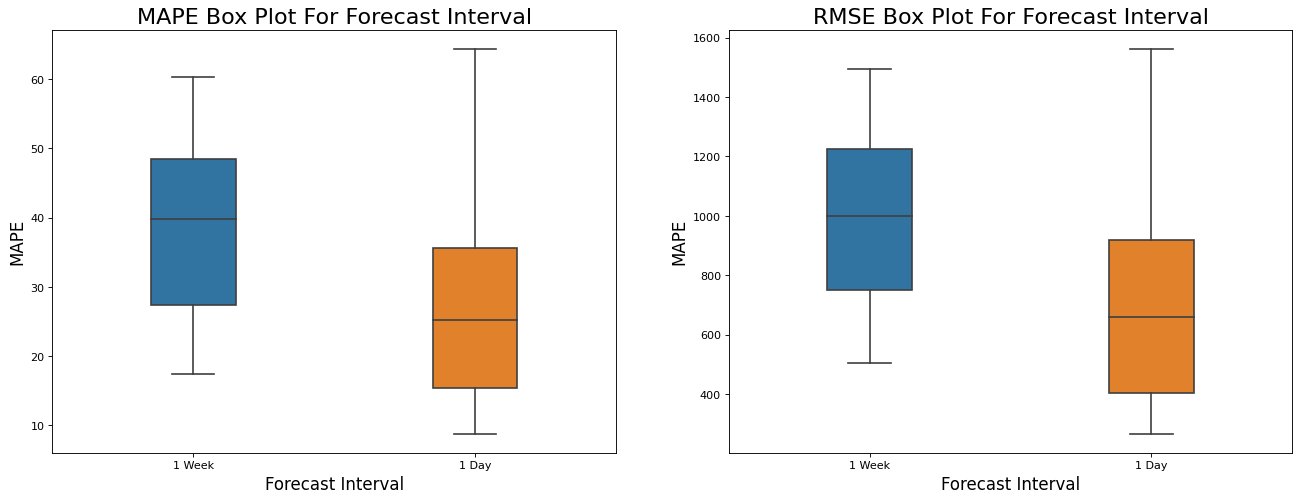

In [114]:
fig, axes = plt.subplots(1,2, figsize=(20,7), dpi=80)
#sns.boxplot(x='Model', y='MAPE', data=Model_df , ax=axes[0])
#sns.boxplot(x='Model', y='RMSE', data=Model_df , ax=axes[1])

#sns.boxplot(x='DL Model', y='MAPE', data=Model_df , ax=axes[0])
#sns.boxplot(x='DL Model', y='RMSE', data=Model_df , ax=axes[1])

#sns.boxplot(x='Transformation', y='MAPE', data=Model_df , ax=axes[0])
#sns.boxplot(x='Transformation', y='RMSE', data=Model_df , ax=axes[1])

a=sns.boxplot(x='Forecast Interval', y='MAPE', data=Model_df , ax=axes[0], width=0.3)
a.set_xlabel("Forecast Interval",fontsize=15)
a.set_ylabel("MAPE",fontsize=15)
b=sns.boxplot(x='Forecast Interval', y='RMSE', data=Model_df , ax=axes[1], width=0.3)
b.set_xlabel("Forecast Interval",fontsize=15)
b.set_ylabel("MAPE",fontsize=15)
#axes[0].set_title('MAPE Box Plot For Model', fontsize=18)
#axes[1].set_title('RMSE Box Plot For Model', fontsize=18)
#axes[0].set_title('MAPE Box Plot For DL Model', fontsize=18)
#axes[1].set_title('RMSE Box Plot For DL Model', fontsize=18)
#axes[0].set_title('MAPE Box Plot For Transformation', fontsize=18)
#axes[1].set_title('RMSE Box Plot For Transformation', fontsize=18)
axes[0].set_title('MAPE Box Plot For Forecast Interval', fontsize=20)
axes[1].set_title('RMSE Box Plot For Forecast Interval', fontsize=20)

In [9]:
Model_df

,Model,DL Model,Transformation,Forecast Interval,Run-Time,MAPE,RMSE
0,MLP,Plain MLP,W/O,1 Week,346.07,46.40,1195.08
1,MLP,Plain MLP,W/O,1 Day,346.00,36.51,910.86
2,MLP,Plain MLP,Square-Root,1 Week,321.46,47.18,1177.53
3,MLP,Plain MLP,Square-Root,1 Day,339.00,35.72,881.52
4,MLP,Plain MLP,Log,1 Week,331.15,46.58,1095.54
...,...,...,...,...,...,...,...
31,LSTM,Encoder-Decoder LSTM,W/O,1 Day,51.06,41.65,1113.92
32,LSTM,Encoder-Decoder LSTM,Square-Root,1 Week,62.06,54.02,1377.54
33,LSTM,Encoder-Decoder LSTM,Square-Root,1 Day,49.13,34.15,922.40
34,LSTM,Encoder-Decoder LSTM,Log,1 Week,64.49,41.18,1211.83


In [12]:
day_df= Model_df.loc[Model_df['Forecast Interval'].values=='1 Day']
week_df= Model_df.loc[Model_df['Forecast Interval'].values=='1 Week']

In [15]:
day_df.describe()

,Run-Time,MAPE,RMSE
count,42.00000,42.000000,42.000000
mean,577.10619,27.318333,715.901429
std,1104.42403,13.510492,332.126430
min,28.01000,8.830000,267.520000
25%,42.54750,15.470000,402.740000
50%,135.63000,25.225000,660.245000
75%,340.47000,35.645000,917.565000
max,3639.75000,64.330000,1561.120000


In [22]:
week_df.describe()

,Run-Time,MAPE,RMSE
count,42.000000,42.000000,42.000000
mean,567.005714,38.440714,1000.560952
std,1070.455274,12.443528,281.099890
min,23.280000,17.360000,506.010000
25%,39.600000,27.457500,750.345000
50%,120.805000,39.870000,1001.035000
75%,328.727500,48.492500,1226.725000
max,3250.600000,60.310000,1495.690000


In [29]:
import researchpy as rp
import statsmodels.api as sm

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 35
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              42 non-null     object 
 1   DL Model           42 non-null     object 
 2   Transformation     42 non-null     object 
 3   Forecast Interval  42 non-null     object 
 4   Run-Time           42 non-null     float64
 5   MAPE               42 non-null     float64
 6   RMSE               42 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


In [26]:
rp.summary_cat(day_df[["Model", "Transformation"]])

,Variable,Outcome,Count,Percent
0,Model,LSTM,18,42.86
1,,MLP,12,28.57
2,,CNN,12,28.57
3,Transformation,Square-Root,14,33.33
4,,W/O,14,33.33
5,,Log,14,33.33


In [70]:
rp.summary_cont(week_df["MAPE"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MAPE,42.0,38.4407,12.4435,1.9201,34.563,42.3184


In [74]:
from statsmodels.formula.api import ols



model = ols("MAPE ~ C(Model, Sum) + C(Transformation, Sum) + C(Model, Sum)*C(Transformation, Sum)  ", data=week_df).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table.to_csv('week-ANOVA.csv')

In [33]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9774134159088135, pvalue=0.5635032653808594)

In [66]:
 stats.levene(day_df['MAPE'][(day_df['Model'] == 'MLP') & (day_df['Transformation'] == 'W/O')].values,
              day_df['MAPE'][(day_df['Model'] == 'MLP') & (day_df['Transformation'] == 'Log')].values,
              day_df['MAPE'][(day_df['Model'] == 'MLP') & (day_df['Transformation'] == 'Square-Root')].values,
              day_df['MAPE'][(day_df['Model'] == 'CNN') & (day_df['Transformation'] == 'W/O')].values,
              day_df['MAPE'][(day_df['Model'] == 'CNN') & (day_df['Transformation'] == 'Log')].values,
              day_df['MAPE'][(day_df['Model'] == 'CNN') & (day_df['Transformation'] == 'Square-Root')].values,
             day_df['MAPE'][(day_df['Model'] == 'LSTM') & (day_df['Transformation'] == 'W/O')].values,
             day_df['MAPE'][(day_df['Model'] == 'LSTM') & (day_df['Transformation'] == 'Log')].values,
             day_df['MAPE'][(day_df['Model'] == 'LSTM') & (day_df['Transformation'] == 'Square-Root')].values)


LeveneResult(statistic=10.430499072435737, pvalue=3.820889372468174e-07)

In [68]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Model_" + day_df.Model.astype(str) + " & " + "Transformation_" + day_df.Transformation.astype(str)

comp = mc.MultiComparison(day_df["MAPE"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Model_CNN & Transformation_Log,Model_CNN & Transformation_Square-Root,5.96,0.9,-19.8356,31.7556,False
Model_CNN & Transformation_Log,Model_CNN & Transformation_W/O,12.6175,0.7608,-13.1781,38.4131,False
Model_CNN & Transformation_Log,Model_LSTM & Transformation_Log,-12.6275,0.6728,-36.1756,10.9206,False
Model_CNN & Transformation_Log,Model_LSTM & Transformation_Square-Root,-0.6808,0.9,-24.2289,22.8672,False
Model_CNN & Transformation_Log,Model_LSTM & Transformation_W/O,13.7625,0.5827,-9.7856,37.3106,False
Model_CNN & Transformation_Log,Model_MLP & Transformation_Log,-12.0175,0.8043,-37.8131,13.7781,False
Model_CNN & Transformation_Log,Model_MLP & Transformation_Square-Root,1.8575,0.9,-23.9381,27.6531,False
Model_CNN & Transformation_Log,Model_MLP & Transformation_W/O,-3.0,0.9,-28.7956,22.7956,False
Model_CNN & Transformation_Square-Root,Model_CNN & Transformation_W/O,6.6575,0.9,-19.1381,32.4531,False
Model_CNN & Transformation_Square-Root,Model_LSTM & Transformation_Log,-18.5875,0.2182,-42.1356,4.9606,False


In [79]:
rp.summary_cont(day_df['MAPE'].groupby(day_df['Transformation']))

,N,Mean,SD,SE,95% Conf.,Interval
Transformation,,,,,,
Log,14,17.8921,7.5657,2.0220,13.5238,22.2605
Square-Root,14,28.6793,10.6281,2.8405,22.5428,34.8158
W/O,14,35.3836,15.4192,4.1210,26.4808,44.2863


In [81]:
rp.summary_cont(day_df['RMSE'].groupby(day_df['Transformation']))

,N,Mean,SD,SE,95% Conf.,Interval
Transformation,,,,,,
Log,14,466.3357,174.4209,46.6159,365.6281,567.0433
Square-Root,14,749.1764,264.9810,70.8192,596.1809,902.1719
W/O,14,932.1921,358.6225,95.8459,725.1297,1139.2546


In [82]:
rp.summary_cont(week_df['RMSE'].groupby(week_df['Transformation']))

,N,Mean,SD,SE,95% Conf.,Interval
Transformation,,,,,,
Log,14,847.1714,195.6597,52.2922,734.2009,960.1420
Square-Root,14,1055.4600,269.7803,72.1018,899.6935,1211.2265
W/O,14,1099.0514,314.8226,84.1399,917.2783,1280.8246


In [83]:
rp.summary_cont(week_df['MAPE'].groupby(week_df['Transformation']))

,N,Mean,SD,SE,95% Conf.,Interval
Transformation,,,,,,
Log,14,32.1964,8.3126,2.2216,27.3969,36.9960
Square-Root,14,40.6329,12.0773,3.2278,33.6596,47.6061
W/O,14,42.4929,14.4408,3.8595,34.1550,50.8307


Text(0.5, 1.0, 'RMSE Box Plot For Transformation in 1 Day Forecast')

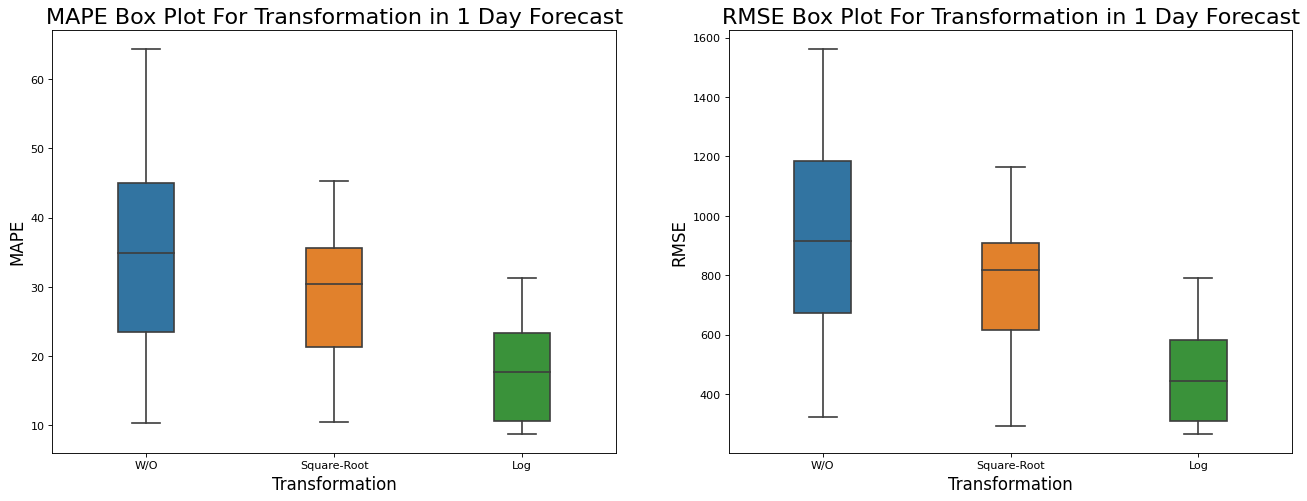

In [113]:
fig, axes = plt.subplots(1,2, figsize=(20,7), dpi=80)
a=sns.boxplot(x='Transformation', y='MAPE', data=day_df , ax=axes[0], width=0.3)
a.set_xlabel("Transformation",fontsize=15)
a.set_ylabel("MAPE",fontsize=15)
b=sns.boxplot(x='Transformation', y='RMSE', data=day_df , ax=axes[1], width=0.3)
b.set_xlabel("Transformation",fontsize=15)
b.set_ylabel("RMSE",fontsize=15)

#sns.boxplot(x='DL Model', y='MAPE', data=day_df , ax=axes[0])
#sns.boxplot(x='DL Model', y='RMSE', data=day_df , ax=axes[1])

#sns.boxplot(x='Transformation', y='MAPE', data=day_df , ax=axes[0], width=0.3)
#sns.boxplot(x='Transformation', y='RMSE', data=day_df , ax=axes[1], width=0.3)

#sns.boxplot(x='Forecast Interval', y='MAPE', data=day_df , ax=axes[0], width=0.3)
#sns.boxplot(x='Forecast Interval', y='RMSE', data=day_df , ax=axes[1], width=0.3)

#axes[0].set_title('MAPE Box Plot For Model in 1 Week Forecast', fontsize=20)
#axes[1].set_title('RMSE Box Plot For Model in 1 Week Forecast', fontsize=20)
#axes[0].set_title('MAPE Box Plot For DL Model', fontsize=18)
#axes[1].set_title('RMSE Box Plot For DL Model', fontsize=18)
axes[0].set_title('MAPE Box Plot For Transformation in 1 Day Forecast', fontsize=20)
axes[1].set_title('RMSE Box Plot For Transformation in 1 Day Forecast', fontsize=20)
#axes[0].set_title('MAPE Box Plot For Forecast Interval', fontsize=18)
#axes[1].set_title('RMSE Box Plot For Forecast Interval', fontsize=18)

In [85]:
import scipy.stats as stats

stats.f_oneway(week_df['MAPE'][week_df['Model'] == 'MLP'],
               week_df['MAPE'][week_df['Model'] == 'CNN'],
               week_df['MAPE'][week_df['Model'] == 'LSTM'])

F_onewayResult(statistic=5.246963045616876, pvalue=0.009593955075975815)

In [86]:
stats.f_oneway(week_df['MAPE'][week_df['Transformation'] == 'Log'],
               week_df['MAPE'][week_df['Transformation'] == 'Square-Root'],
               week_df['MAPE'][week_df['Transformation'] == 'W/O'])

F_onewayResult(statistic=2.9859580374460966, pvalue=0.062144500587989975)

In [87]:
stats.f_oneway(day_df['MAPE'][day_df['Model'] == 'MLP'],
               day_df['MAPE'][day_df['Model'] == 'CNN'],
               day_df['MAPE'][day_df['Model'] == 'LSTM'])

F_onewayResult(statistic=1.940451918730558, pvalue=0.15725815890167638)

In [88]:
stats.f_oneway(day_df['MAPE'][day_df['Transformation'] == 'Log'],
               day_df['MAPE'][day_df['Transformation'] == 'Square-Root'],
               day_df['MAPE'][day_df['Transformation'] == 'W/O'])

F_onewayResult(statistic=8.017739407868742, pvalue=0.001211228905991577)

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MAPE ~ C(Transformation)', data=week_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Transformation),843.030386,2.0,2.985958,0.062145
Residual,5505.466693,39.0,NaN,NaN


In [96]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Transformation),843.030386,2.0,421.515193,2.985958,0.062145,0.132792,0.086399
Residual,5505.466693,39.0,141.165813,NaN,NaN,NaN,NaN


In [107]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(week_df['MAPE'], week_df['Model'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
CNN,LSTM,-2.5819,0.0154,0.0461,True
CNN,MLP,0.4414,0.6632,1.0,False
LSTM,MLP,3.0679,0.0047,0.0142,True
